In [14]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
pathSun = 'example_data/'
pathLamp = 'neon_data/'

'''Importing biases'''

biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(pathSun+'tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
avg_bias = np.asarray(biases).mean(axis=0)

In [16]:
'''Importing exposures and background frames'''

lamp_on  = []
lamp_off = []

Helamp_on  = []
Helamp_off = []

sun_on  = []
sun_off = []


for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(pathSun+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(pathSun+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(1,4):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata(pathLamp+'T'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(4,7):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(pathLamp+'T'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(21,23):
    zeros = (8-len(str(i)))*'0'
    Helamp_on.append(fits.getdata(pathSun+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(24,26):
    zeros = (8-len(str(i)))*'0'
    Helamp_off.append(fits.getdata(pathSun+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

In [17]:
'''Subtracting biases'''

lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
Helamp_on_sub_bias = [Helamp - avg_bias for Helamp in Helamp_on]
Helamp_off_sub_bias = [Helamp - avg_bias for Helamp in Helamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
Heavg_lamp_off = np.asarray(Helamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

In [18]:
'''Subtracting background frames'''

lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
Helamp_corrected = [Helamp_on - Heavg_lamp_off for Helamp_on in Helamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
Heavg_lamp = np.asarray(Helamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

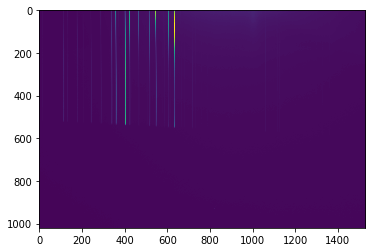

In [19]:
'''Photo of neon spectrum'''

plt.imshow(avg_lamp)
plt.show()

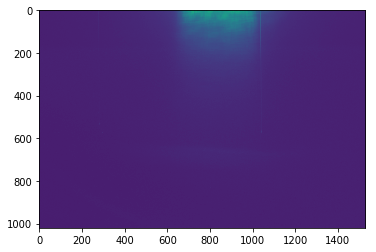

In [20]:
'''Photo of helium spectrum'''

plt.imshow(Heavg_lamp)
plt.show()

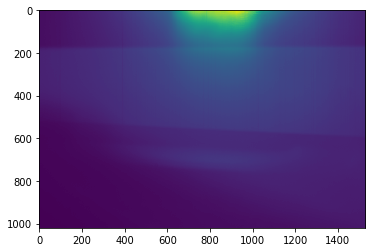

In [21]:
'''Photo of the sun's spectrum'''

plt.imshow(avg_sun)
plt.show()

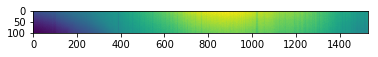

In [22]:
'''Sun's spectrum'''

plt.imshow(avg_sun[400:500,:])

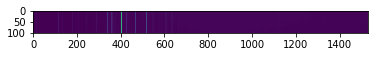

In [23]:
'''Neon spectrum'''

plt.imshow(avg_lamp[400:500,:])

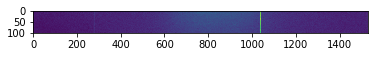

In [24]:
'''Helium spectrum'''

plt.imshow(Heavg_lamp[400:500,:])

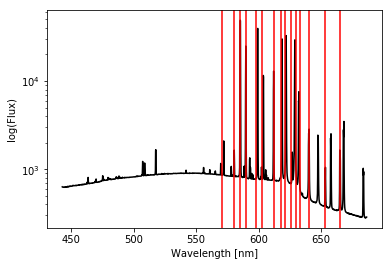

'Neon wavelength vs flux with lines from table in red'

In [27]:
lamp_good = np.asarray(avg_lamp[400:500,:]).mean(axis=0)
Helamp_good = np.asarray(Heavg_lamp[400:500,:]).mean(axis=0)#De-noising the spectrums
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

'''Actual neon (& helium) lines pulled from table for calibration'''
He_lines = [587, 706]
neon_lines = [571,580,585,590,598,603,612,618,621,626,630,633,640,653,665]

'''Fitting'''

strech = 6.28
shift = 443

plt.plot(np.flip((np.arange(len(lamp_good)) / strech) + shift,0), lamp_good, 'k-')
for line in neon_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlabel('Wavelength [nm]')
plt.ylabel('log(Flux)')
plt.show()

'''Neon wavelength vs flux with lines from table in red'''

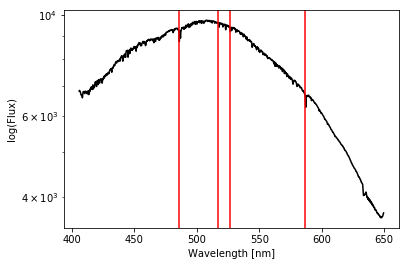

'Sun wavelength vs flux with lines from wiki in red'

In [28]:
'''Applying the calibration from the neon lines to the solar spectrum'''

sun_lines = [486,517,527,587]
SunShift = 406

plt.plot(np.flip((np.arange(len(sun_good)) / strech) + SunShift,0), sun_good, 'k-')
for line in sun_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlabel('Wavelength [nm]')
plt.ylabel('log(Flux)')
plt.show()

'''Sun wavelength vs flux with lines from wiki in red'''